In [142]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Set the theme for seaborn
sns.set_theme()

# Suppress warnings
warnings.filterwarnings('ignore')

# Get The Data

In [144]:
data = pd.read_csv('C:/Users/hpc/OneDrive/Desktop/DT/ML/Breast Cancer Project/data.csv')
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,845636,84610002,846226,846381,84667401
diagnosis,M,M,M,M,M,M,M,M,M,M,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,16.02,15.78,19.17,15.85,13.73
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,23.24,17.89,24.8,23.95,22.61
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,102.7,103.6,132.4,103.7,93.6
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,797.8,781.0,1123.0,782.7,578.3
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,0.08206,0.0971,0.0974,0.08401,0.1131
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,0.06669,0.1292,0.2458,0.1002,0.2293
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,0.03299,0.09954,0.2065,0.09938,0.2128
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,0.03323,0.06606,0.1118,0.05364,0.08025


# Info

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [146]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [147]:
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


# Cleaning

In [148]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [149]:
data.duplicated().sum()

np.int64(0)

* The data Already Cleaned but we need to drop Unused Columns

In [150]:
data.drop(["Unnamed: 32" , "id"] , axis=1 , inplace = True)

# EDA

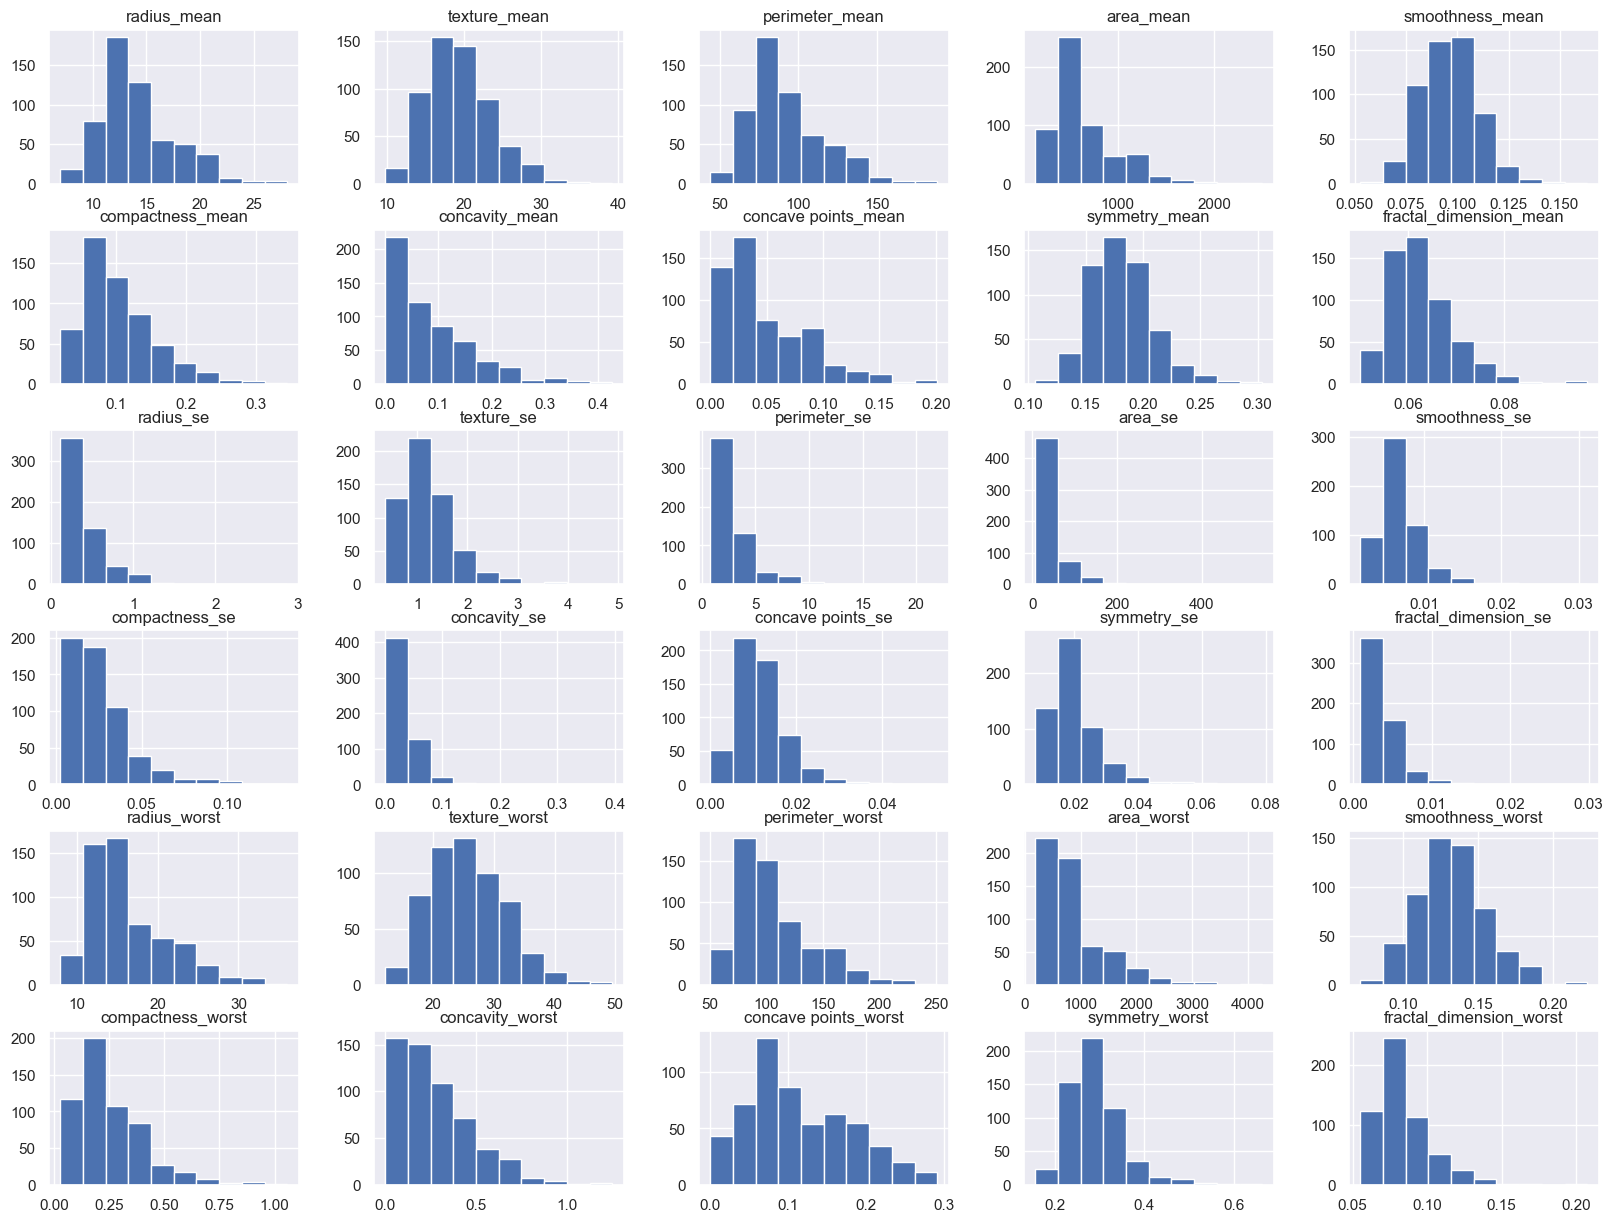

In [151]:
data.hist(figsize = (20, 15))
plt.show()

In [152]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

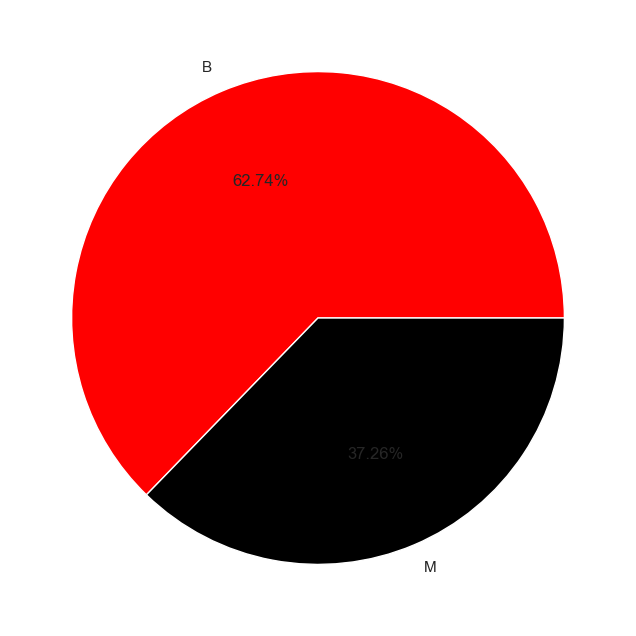

In [153]:
# Calculate the counts of each diagnosis category
data_counts = data['diagnosis'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.2f%%',colors=['red','black'])
plt.show()

* Most Diagnosis is Benign

# Prepare Data

In [154]:
# Encode the diagnosis column: M = 1, B = 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [155]:
data['diagnosis'].unique()

array([1, 0])

# Correlation

In [156]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


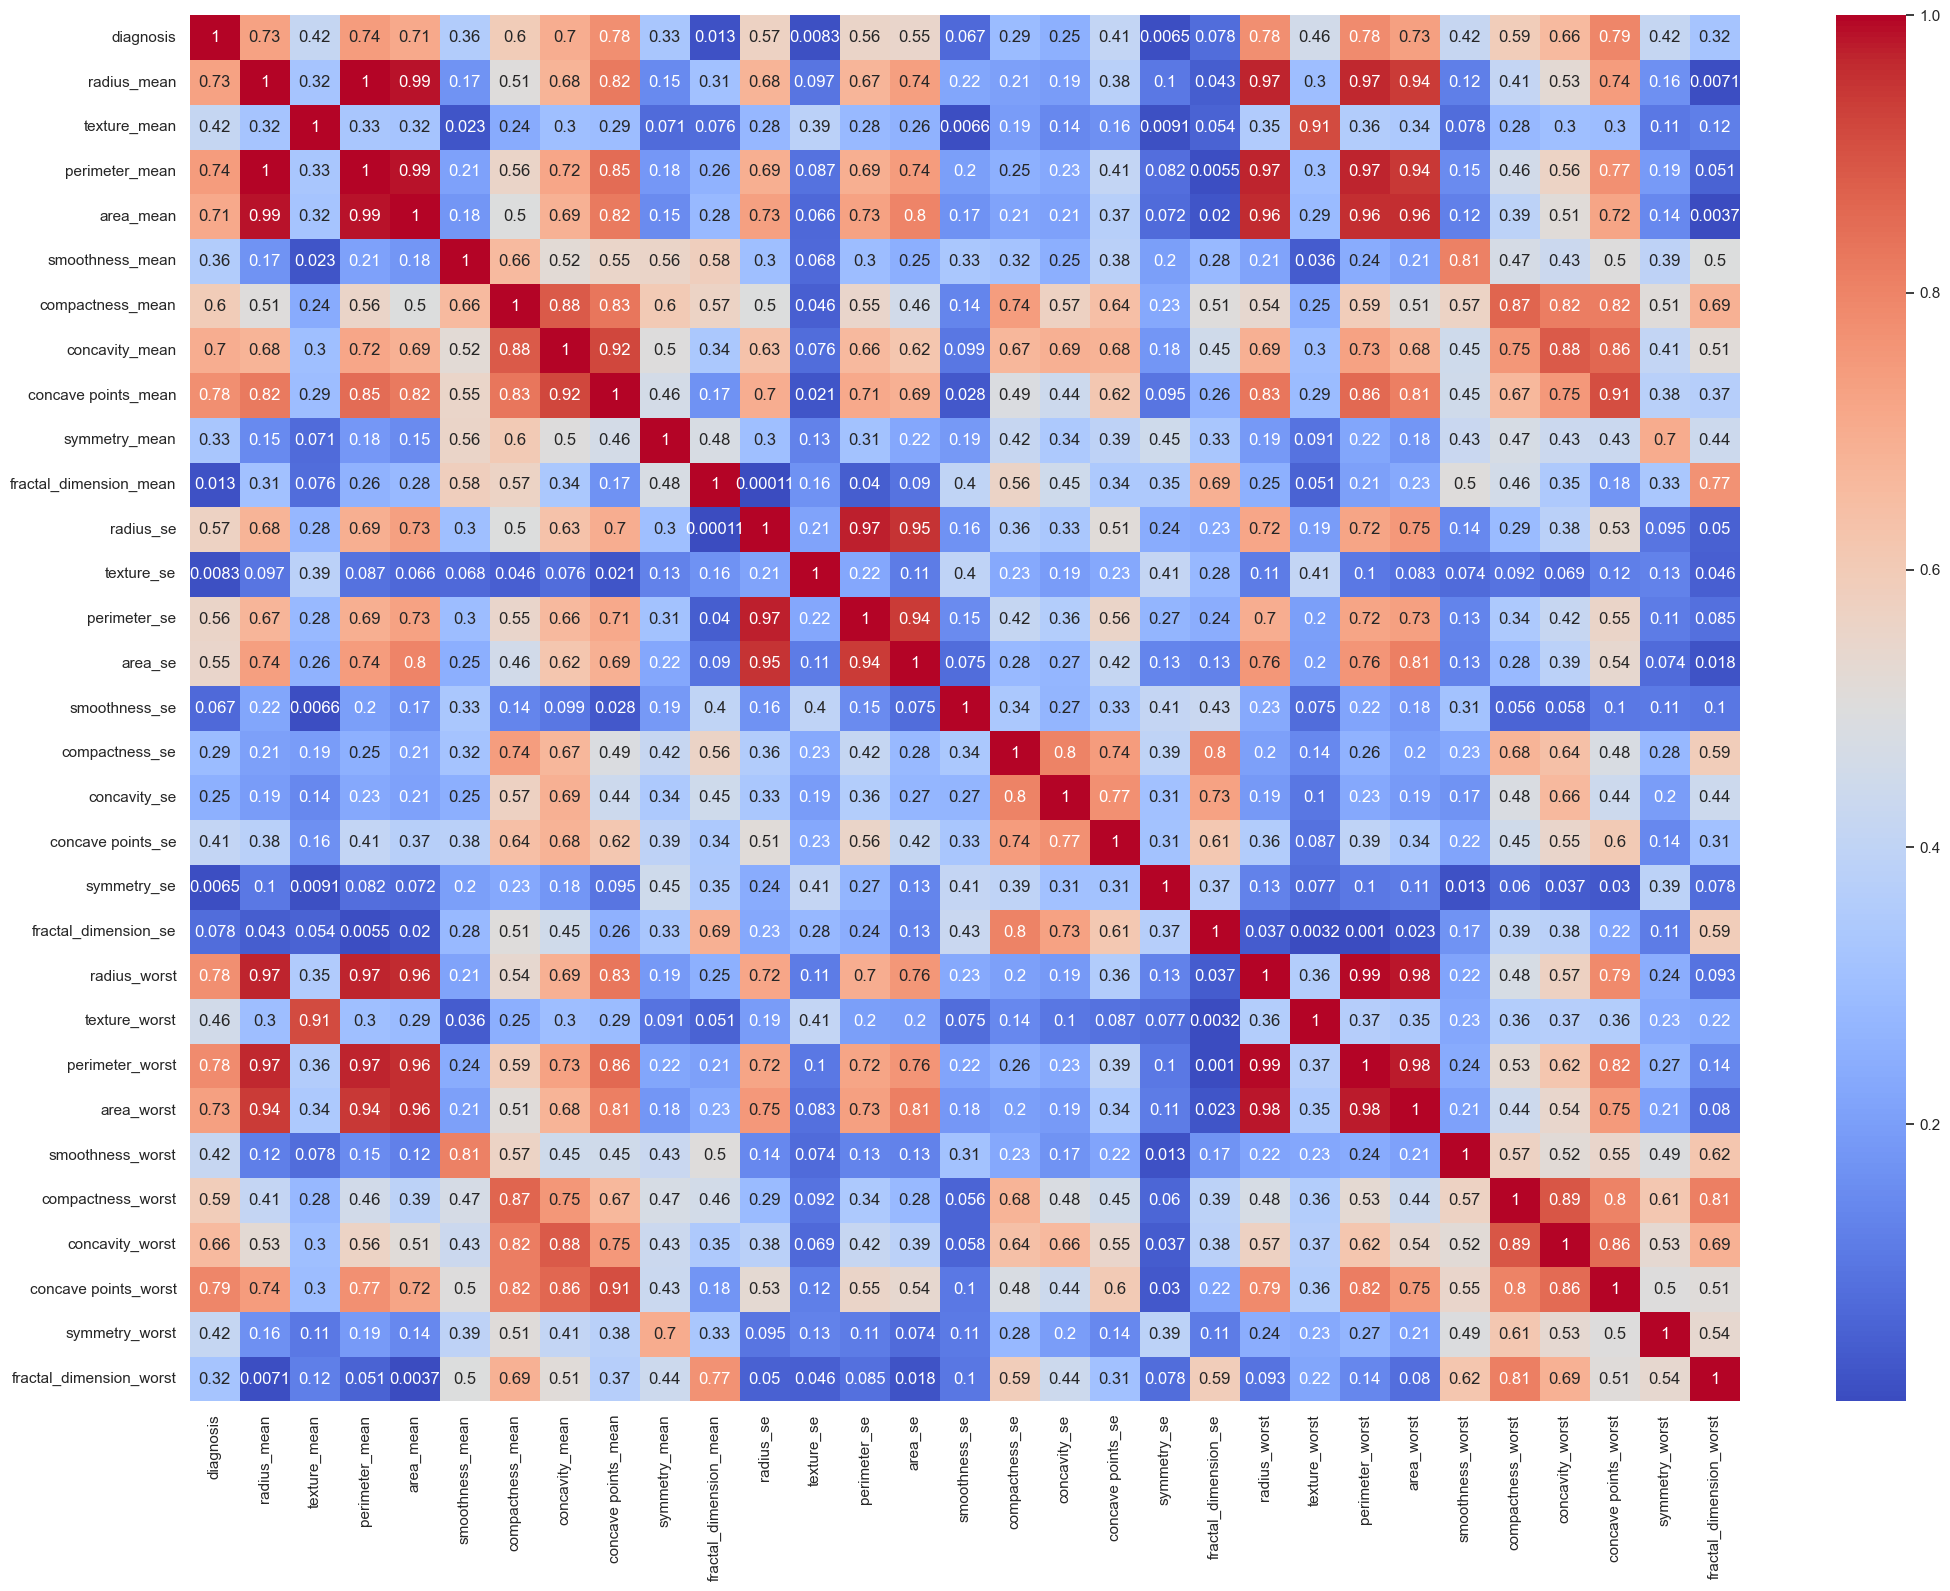

In [157]:
# Create the heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(data.corr().abs(), annot=True, cmap='coolwarm')
plt.show()

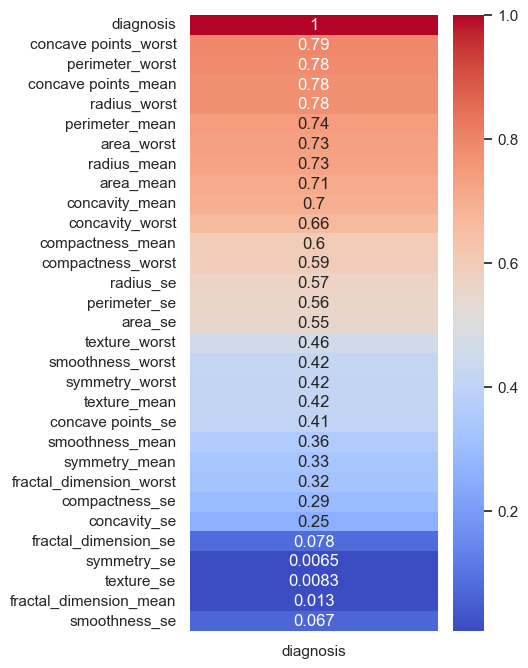

In [158]:
# Create the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(data.corr()["diagnosis"].sort_values(ascending=False).abs().to_frame(), annot=True, cmap='coolwarm')
plt.show()

* drop the columns are have low correlition

In [159]:
data.drop(["fractal_dimension_se" , "symmetry_se" , "fractal_dimension_mean" , "texture_se" , "smoothness_se"] , axis=1 , inplace = True)

# Data Spiliting

In [160]:
x = data.drop("diagnosis"  , axis = 1)
y = data['diagnosis']

In [161]:
from sklearn.model_selection import train_test_split

xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size=0.2, random_state = 42)

# Data Preprossesing

In [162]:
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()

xtrain_prep = std_sc.fit_transform(xtrain)
xtest_prep = std_sc.transform(xtest)

# Modeling

In [163]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(xtrain_prep, ytrain)  # Fit with training data (features and labels)

# To make predictions on the test set:
y_pred = log_reg.predict_proba(xtrain_prep)

In [164]:
from sklearn.metrics import accuracy_score

y_pred_prob = log_reg.predict_proba(xtrain_prep)[:, 1]  
y_pred_train = (y_pred_prob >= 0.5).astype(int)  
accuracy_train = accuracy_score(ytrain, y_pred_train)

y_pred_prob = log_reg.predict_proba(xtest_prep)[:, 1]  
y_pred_test = (y_pred_prob >= 0.5).astype(int)  
accuracy_test = accuracy_score(ytest, y_pred_test)

print(f'Accuracy Training: {accuracy_train * 100:.2f}%')
print(f'Accuracy Training: {accuracy_test * 100:.2f}%')

Accuracy Training: 98.68%
Accuracy Training: 97.37%


In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {'solver': ['lbfgs', 'liblinear'],
              'penalty': ['l1', 'l2', "None"], 
              'C': [0.0001, 0.001, 0.01, 1, 3]}

grid_search = GridSearchCV(estimator = log_reg, param_grid = param_grid, cv = 5)

grid_search.fit(xtrain_prep, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 3],
                         'penalty': ['l1', 'l2', 'None'],
                         'solver': ['lbfgs', 'liblinear']})

In [166]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [167]:
grid_search.best_score_

np.float64(0.9780219780219781)

In [168]:
log_reg = LogisticRegression(**grid_search.best_params_ , random_state=42)
log_reg.fit(xtrain_prep, ytrain)
y_pred = log_reg.predict(xtest_prep)

print('Training Score: ', log_reg.score(xtrain_prep, ytrain))
print('Test Score: ', log_reg.score(xtest_prep, ytest))

Training Score:  0.9868131868131869
Test Score:  0.9736842105263158


In [169]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest , y_pred)

array([[69,  2],
       [ 1, 42]])

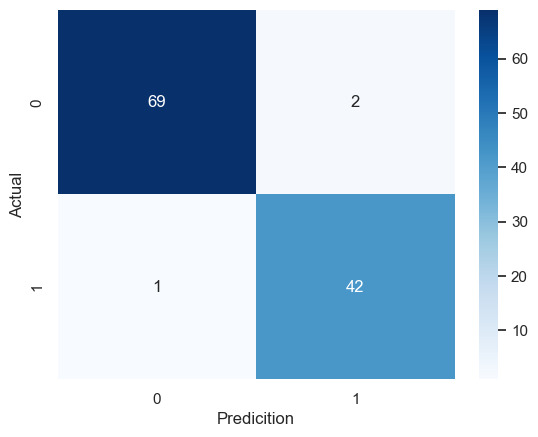

In [170]:
sns.heatmap(confusion_matrix(ytest , y_pred), annot=True, cmap='Blues')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.show()

In [171]:
# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()

# Output the results
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 69
False Positives: 2
False Negatives: 1
True Positives: 42


In [172]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred , zero_division = 0))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [173]:
import joblib

# Save the trained model to a file
joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(std_sc, 'scalar.pkl')

['scalar.pkl']

In [174]:
%%writefile diagnosis_app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the model and scaler
model = joblib.load('logistic_regression_model.pkl')  # replace with your model file
scaler = joblib.load('scalar.pkl')  # replace with your scaler file

# Load your dataset to get min and max values
data = pd.read_csv("C:/Users/hpc/OneDrive/Desktop/DT/ML/Breast Cancer Project/data.csv")  # replace with your data file

# Title 
st.title("Breast Cancer Diagnosis Prediction")
st.subheader("This app uses a trained model to predict whether a tumor is malignant or benign based on input features.")

# User input using min and max from the dataset
radius_mean = st.slider("Radius Mean", float(data["radius_mean"].min()), float(data["radius_mean"].max()), float(data["radius_mean"].median()))  
texture_mean = st.slider("Texture Mean", float(data["texture_mean"].min()), float(data["texture_mean"].max()), float(data["texture_mean"].median()))
perimeter_mean = st.slider("Perimeter Mean", float(data["perimeter_mean"].min()), float(data["perimeter_mean"].max()), float(data["perimeter_mean"].median()))
area_mean = st.slider("Area Mean", float(data["area_mean"].min()), float(data["area_mean"].max()), float(data["area_mean"].median()))
smoothness_mean = st.slider("Smoothness Mean", float(data["smoothness_mean"].min()), float(data["smoothness_mean"].max()), float(data["smoothness_mean"].median()))
compactness_mean = st.slider("Compactness Mean", float(data["compactness_mean"].min()), float(data["compactness_mean"].max()), float(data["compactness_mean"].median()))
concavity_mean = st.slider("Concavity Mean", float(data["concavity_mean"].min()), float(data["concavity_mean"].max()), float(data["concavity_mean"].median()))
concave_points_mean = st.slider("Concave Points Mean", float(data["concave points_mean"].min()), float(data["concave points_mean"].max()), float(data["concave points_mean"].median()))
symmetry_mean = st.slider("Symmetry Mean", float(data["symmetry_mean"].min()), float(data["symmetry_mean"].max()), float(data["symmetry_mean"].median()))
radius_se = st.slider("Radius SE", float(data["radius_se"].min()), float(data["radius_se"].max()), float(data["radius_se"].median()))
perimeter_se = st.slider("Perimeter SE", float(data["perimeter_se"].min()), float(data["perimeter_se"].max()), float(data["perimeter_se"].median()))
area_se = st.slider("Area SE", float(data["area_se"].min()), float(data["area_se"].max()), float(data["area_se"].median()))
fractal_dimension_worst = st.slider("fractal dimension worst", float(data["fractal_dimension_worst"].min()), float(data["fractal_dimension_worst"].max()), float(data["fractal_dimension_worst"].median()))
compactness_se = st.slider("Compactness SE", float(data["compactness_se"].min()), float(data["compactness_se"].max()), float(data["compactness_se"].median()))
concavity_se = st.slider("Concavity SE", float(data["concavity_se"].min()), float(data["concavity_se"].max()), float(data["concavity_se"].median()))
concave_points_se = st.slider("Concave Points SE", float(data["concave points_se"].min()), float(data["concave points_se"].max()), float(data["concave points_se"].median()))
radius_worst = st.slider("Radius Worst", float(data["radius_worst"].min()), float(data["radius_worst"].max()), float(data["radius_worst"].median()))
texture_worst = st.slider("Texture Worst", float(data["texture_worst"].min()), float(data["texture_worst"].max()), float(data["texture_worst"].median()))
perimeter_worst = st.slider("Perimeter Worst", float(data["perimeter_worst"].min()), float(data["perimeter_worst"].max()), float(data["perimeter_worst"].median()))
area_worst = st.slider("Area Worst", float(data["area_worst"].min()), float(data["area_worst"].max()), float(data["area_worst"].median()))
smoothness_worst = st.slider("Smoothness Worst", float(data["smoothness_worst"].min()), float(data["smoothness_worst"].max()), float(data["smoothness_worst"].median()))
compactness_worst = st.slider("Compactness Worst", float(data["compactness_worst"].min()), float(data["compactness_worst"].max()), float(data["compactness_worst"].median()))
concavity_worst = st.slider("Concavity Worst", float(data["concavity_worst"].min()), float(data["concavity_worst"].max()), float(data["concavity_worst"].median()))
concave_points_worst = st.slider("Concave Points Worst", float(data["concave points_worst"].min()), float(data["concave points_worst"].max()), float(data["concave points_worst"].median()))
symmetry_worst = st.slider("Symmetry Worst", float(data["symmetry_worst"].min()), float(data["symmetry_worst"].max()), float(data["symmetry_worst"].median()))

# Store inputs in a DataFrame
input_data = {
    "radius_mean": radius_mean,
    "texture_mean": texture_mean,
    "perimeter_mean": perimeter_mean,
    "area_mean": area_mean,
    "smoothness_mean": smoothness_mean,
    "compactness_mean": compactness_mean,
    "concavity_mean": concavity_mean,
    "concave points_mean": concave_points_mean,
    "symmetry_mean": symmetry_mean,
    "radius_se": radius_se,
    "perimeter_se": perimeter_se,
    "area_se": area_se,
    "compactness_se": compactness_se,
    "concavity_se": concavity_se,
    "concave points_se": concave_points_se,
    "radius_worst": radius_worst,
    "texture_worst": texture_worst,
    "perimeter_worst": perimeter_worst,
    "area_worst": area_worst,
    "smoothness_worst": smoothness_worst,
    "compactness_worst": compactness_worst,
    "concavity_worst": concavity_worst,
    "concave points_worst": concave_points_worst,
    "symmetry_worst": symmetry_worst,
    "fractal_dimension_worst": fractal_dimension_worst,
}

features = pd.DataFrame(input_data, index=[0])

# Scale the input data
features_scaled = scaler.transform(features)

# Make predictions
prediction = model.predict(features_scaled)

# Display the prediction
if prediction[0] == 1:
    st.write("### Prediction: Malignant")
else:
    st.write("### Prediction: Benign")


Overwriting diagnosis_app.py


In [175]:
!pip freeze > requirements.txt

**We Are Done✅**